# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective 

At the end of the experiment, you will be able to:

*  Understand clustering
*  Find groups or clusters using K-means algorithm

In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/3March/kmeans.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

The dataset choosen for this experiment is hand-made dataset. We have generated the data programmatically by following Random / Gaussian distribution. The dataset includes 3000 instances where each instance is made up of 2 features.

## AIML Technique

### Clustering

Given a unfamiliar dataset, a clustering algorithm helps to discover groups of objects where the average distances between the members of each cluster are closer than to members in other clusters.

Clustering is used to find structure in unlabeled data. It’s the most common form of unsupervised learning. 

Several Algorithms have been proposed for clustering. However, when compared to other clustering algorithms the K-means algorithm is more effective. This is because K-means allows us to pre-cluster the database which in turn produces good results.

Additionally, K-means clustering is the simplest to implement and to run. All we need to do is choose the number of clusters(K) and run it number of times.

We use K-means algorithm for clustering in this experiment.

### K-means Algorithm

K-means clustering is the process of partitioning a set of data objects into subsets. Each subset is a cluster such that the similarity within the cluster is greater and the similarity between the other clusters is less. 

K-means algorithm iteratively performs this two steps: 

1. The first step assigns clusters to points by assigning them to the cluster with nearest centriod. 
2. The second step calculates the new mean from the points belonging to the cluster. 

We repeat these two steps till convergence.

#### Keywords

* Clusters
* K-Means
* Centroids

#### Expected time to complete this experiment is : 60 min

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W2E19_Kmeans_Clustering" #name of the notebook
def setup():
#  ipython.magic("sx pip3 install torch")
   ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week8/Exp2/AIML_DS_CLARA_STD.csv")
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


Let us learn the kmeans algorithm step by step.

#### 1. Loading the dataset

In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

In [0]:
# Setting up the file. The data below is a simple Gaussian distribution of data.
dataset = "AIML_DS_CLARA_STD.csv"

In [0]:
data=pd.read_csv(dataset)

In [15]:
data

,Unnamed: 0,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729
5,6,24.169930,32.024780
6,7,21.665780,4.892855
7,8,4.693684,12.342170
8,9,19.211910,-1.121366
9,10,4.230391,-4.441536


#### 2. Getting the values and plotting them.

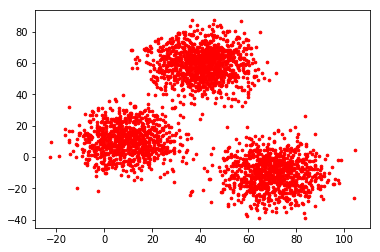

In [11]:
# Storing the values in seperate variables
f1 = data['V1'].values
f2 = data['V2'].values
# Ploting the data
%matplotlib inline
# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

Now let us write a function to calculate Euclidean Distance between two vectors 'a' and 'b'.

In [0]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#### 3.We will intialize three cluster centers randomly to start the k-means algorithm.

In [18]:
# Number of clusters
k = 5
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[21. 79.]
 [ 8.  6.]
 [58. 18.]
 [10. 66.]
 [39.  0.]]


##### This is how the data looks when the algorithm get intialized.

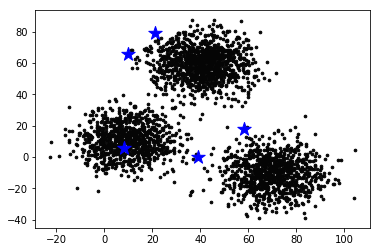

In [19]:
# Plotting along with the Centroids
%matplotlib inline
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

Now we will put our learning from above together and see how exactly k-means algorithm works.

### Applying  K-means algorithm 



error: 43.43487
error: 15.033216
error: 2.211205
error: 1.3803736
error: 0.8643304
error: 0.73466456
error: 0.48882136
error: 0.43933868
error: 0.6044812
error: 0.5147246
error: 0.68118525
error: 0.6568773
error: 0.5092915
error: 0.4431248
error: 0.22734687
error: 0.24822122
error: 0.15943177
error: 0.1162594
error: 0.08850912


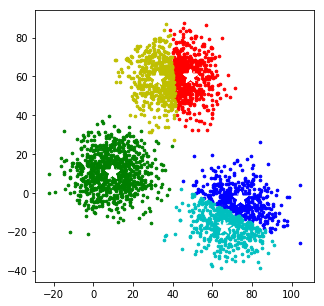

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()# turning on plot in interactive mode. This is because, as you'll see below, the plot keeps getting updated in loop.
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)#This find distance of X[i] from each of the 5 centroid points contained within C
        cluster = np.argmin(distances)# Out of all the distances found above, the centroid with the least distance is found here
        clusters[i] = cluster #The cluster center found above is now the new cluster assignment for the point X[i]

    # Storing the old centroid values
    C_old = deepcopy(C)# we use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
    # Finding the new centroids by taking the average value
    
    for i in range(k):#we iterate through each of the 5 clusters.
        points = [X[j] for j in range(len(X)) if clusters[j] == i]#we pull out all the points that were assigned to the new cluster above (in 'clusters' variabe)
        C[i] = np.mean(points, axis=0)#Using the points above, we recomupte the new center, by taking the mean.

    error = dist(C, C_old, None)#now we compare the error between the new cluster centres and the old cluster centres.
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='w')

    print("error:",error)


**Ungraded Exercise ** change the number of cluster  and check how the plot is changing

[[51. 38.]]
[[ 5. 20.]
 [36. 54.]]
[[28. 45.]
 [79. 75.]
 [79. 81.]]
[[41. 52.]
 [82. 28.]
 [39. 75.]
 [64. 68.]]
[[14. 52.]
 [32. 79.]
 [72. 81.]
 [ 8. 32.]
 [46. 52.]]


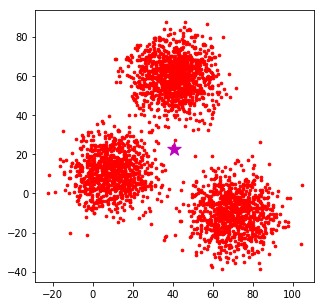

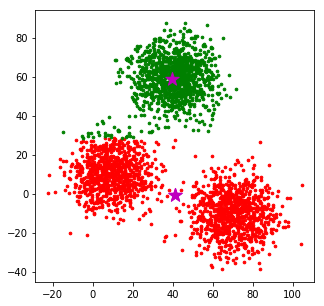

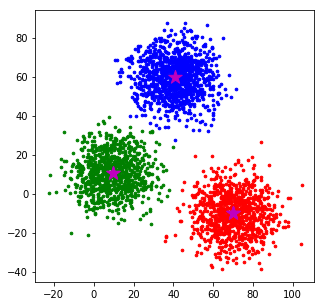

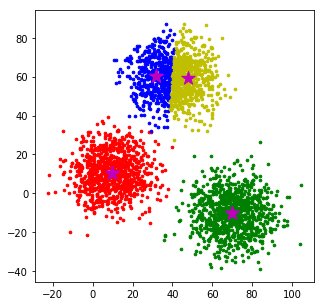

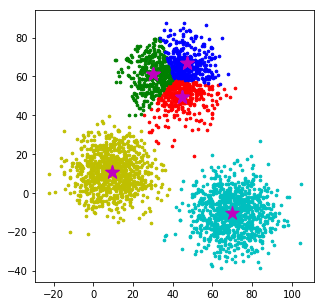

In [26]:
# Your Code Here
import matplotlib.pyplot as plt

# Number of clusters
K = [1,2,3,4,5]
for k in K:
  # X coordinates of random centroids
  x = np.random.randint(0, np.max(X)-20, size=k)
  # Y coordinates of random centroids
  y = np.random.randint(0, np.max(X)-20, size=k)
  C = np.array(list(zip(x, y)), dtype=np.float32)
  print(C)


#   %matplotlib inline
  

  # To store the value of centroids when it updates
  C_old = np.zeros(C.shape)
  # Cluster Lables(0, 1, 2)
  clusters = np.zeros(len(X))
  # Error func. - Distance between new centroids and old centroids
  error = dist(C, C_old, None)

  # Loop will run till the error becomes zero
  fig = plt.figure(figsize=(5, 5))
  ax = fig.add_subplot(111)
  plt.ion()# turning on plot in interactive mode. This is because, as you'll see below, the plot keeps getting updated in loop.
  while error >= 0.1:

      colors = ['r', 'g', 'b', 'y', 'c', 'm']

      # Assigning each value to its closest cluster

      for i in range(len(X)):
          distances = dist(X[i], C)#This find distance of X[i] from each of the 5 centroid points contained within C
          cluster = np.argmin(distances)# Out of all the distances found above, the centroid with the least distance is found here
          clusters[i] = cluster #The cluster center found above is now the new cluster assignment for the point X[i]

      # Storing the old centroid values
      C_old = deepcopy(C)# we use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
      # Finding the new centroids by taking the average value

      for i in range(k):#we iterate through each of the 5 clusters.
          points = [X[j] for j in range(len(X)) if clusters[j] == i]#we pull out all the points that were assigned to the new cluster above (in 'clusters' variabe)
          C[i] = np.mean(points, axis=0)#Using the points above, we recomupte the new center, by taking the mean.

      error = dist(C, C_old, None)#now we compare the error between the new cluster centres and the old cluster centres.
      #print(k)
      ax.clear()
      for i in range(k):
          points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
          plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
          plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='m')

  #     print("error:",error)


### Please answer the questions below to complete the experiment:

In [0]:
#@title After initializing the random centroids, the first step inolves, computing the mean?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer="FALSE" #@param ["TRUE","FALSE"]

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = " test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [32]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4526
Date of submission:  02 May 2019
Time of submission:  23:04:34
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
